<a href="https://colab.research.google.com/github/tamayzengin/Machine-learning-algorhythms/blob/main/notebooks/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Configuration and packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/DATA

/content/drive/MyDrive/Colab Notebooks/DATA


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('hearing_test.csv')

#**Exploratory data analysis**

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [ ]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [ ]:
df['test_result']

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

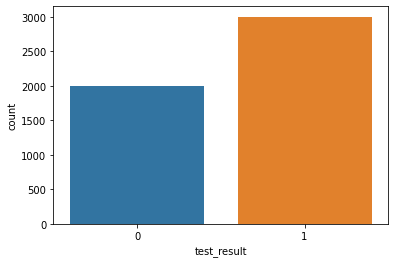

In [ ]:
sns.countplot(data=df,x='test_result');

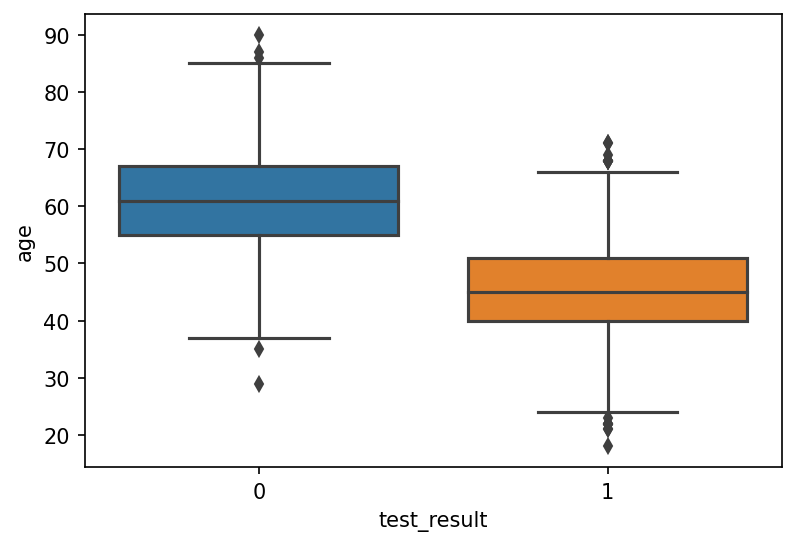

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result',y='age')

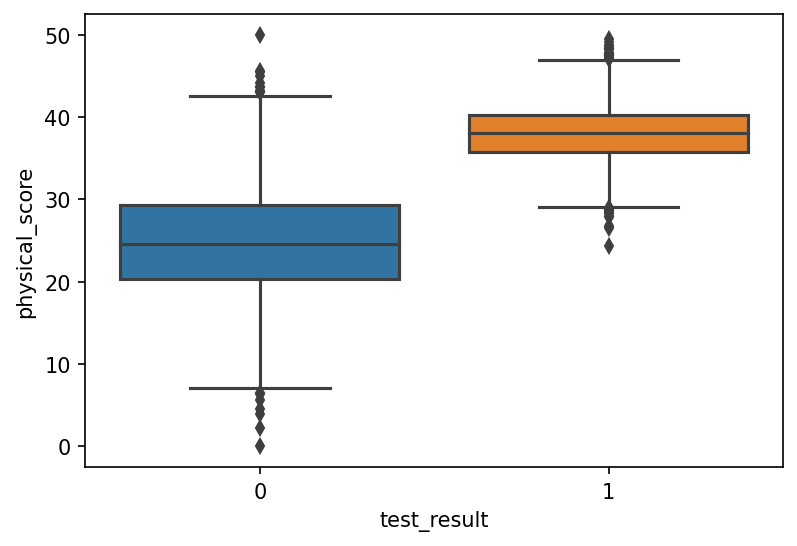

In [ ]:
plt.figure(dpi=150)
sns.boxplot(data=df,x='test_result',y='physical_score')

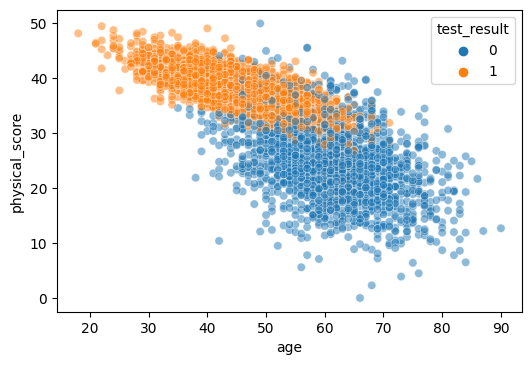

In [ ]:
plt.figure(dpi=100)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.5);

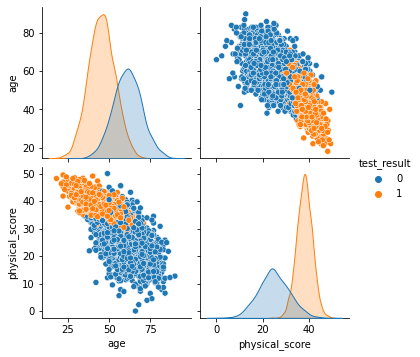

In [ ]:
sns.pairplot(df,hue='test_result')

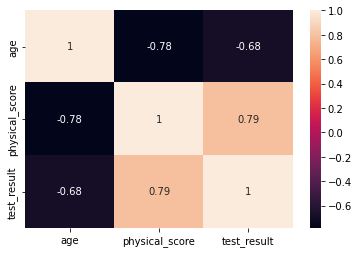

In [ ]:
sns.heatmap(df.corr(),annot=True);

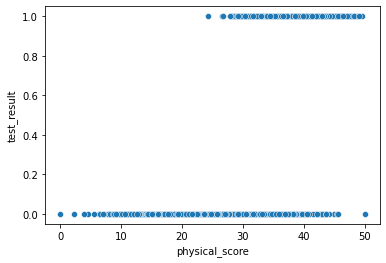

In [ ]:
sns.scatterplot(data=df,x='physical_score',y='test_result')

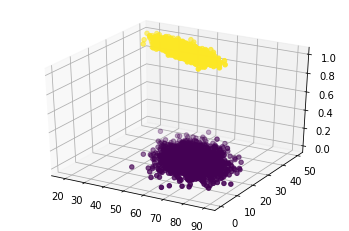

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result']);

#**Model Training**

In [ ]:
X = df.drop('test_result',axis=1)

In [ ]:
y= df['test_result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [ ]:
y_pred=log_model.predict_proba(scaled_X_train)

In [ ]:
y_pred

array([[1.48464104e-03, 9.98515359e-01],
       [9.25439172e-01, 7.45608285e-02],
       [2.19215982e-04, 9.99780784e-01],
       ...,
       [9.96056422e-01, 3.94357754e-03],
       [9.97043598e-01, 2.95640201e-03],
       [1.68748314e-03, 9.98312517e-01]])

#**Classification Performance Matrix**

In [ ]:
from PIL import Image

In [ ]:
#Accuracy = (TP + TN) / Total 

In [ ]:
#recall = (Total Predicted)/Total

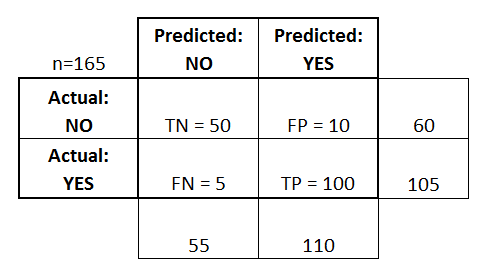

In [ ]:
Image.open('confusion_matrix2.png') 

In [ ]:
#ROC curves

#**Performance Evaluation**

In [ ]:
log_model.coef_ #[x11] if Age increases test_results decrease, [x12] if physical_score increase, test_results also increase

array([[-0.94953524,  3.45991194]])

In [ ]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred= log_model.predict(scaled_X_test)

In [ ]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
accuracy_score(y_test,y_pred)

0.93

In [ ]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


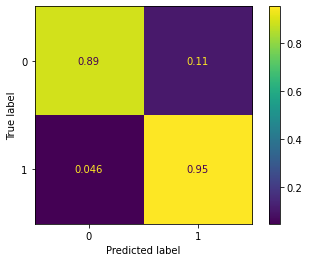

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true');

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
precision_score(y_test,y_pred)

0.9331210191082803

In [ ]:
recall_score(y_test,y_pred)

0.9543973941368078

In [ ]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


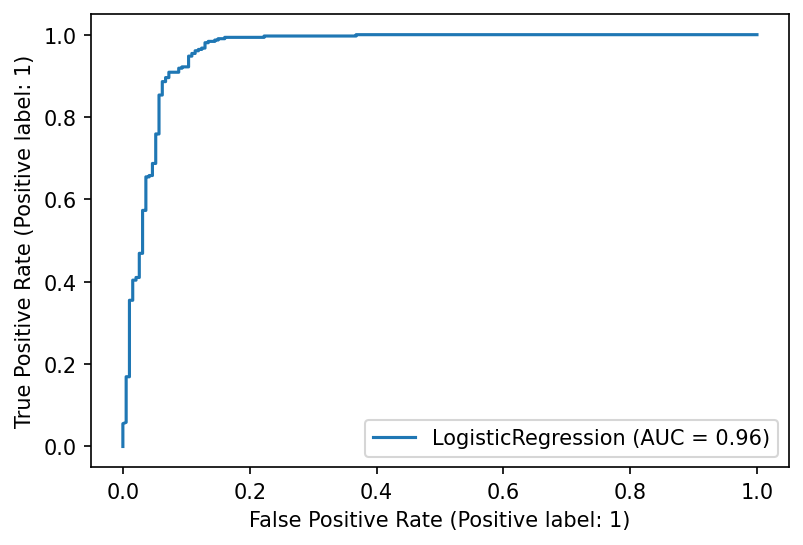

In [ ]:
fig,ax=plt.subplots(dpi=150) 
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


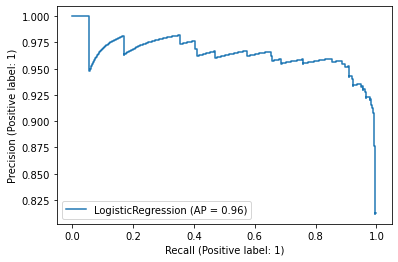

In [ ]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [ ]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [ ]:
y_test[0]

1

model predicts,y_test[0] 97%, 1 and 2.3% belongs to 0   

In [ ]:
log_model.predict_proba(scaled_X_test)[1]

array([0.02692408, 0.97307592])

In [ ]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64